# Mobile Selling Price Prediction

## Objective
Predict the **selling price** of mobile phones based on their specifications on Flipkart.

## Dataset Overview
Contains details of phones like brand, memory, battery, ratings, and target: selling price.

## Workflow
1. Load and explore data
2. Clean and preprocess
3. Feature engineering
4. Model training
5. Evaluation

In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [48]:
# Load dataset
df = pd.read_csv("Flipkart_Mobiles.csv")
df.info()
df.head()
df.shape
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


## Data Cleaning & Exploration

In [ ]:
# Check for missing values


# Drop rows with missing target


# Basic distribution


In [17]:

missing_values = df.isnull().sum()

# Display result
print("Missing Values Count per Column:")
print(missing_values)


Missing Values Count per Column:
Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64


In [18]:
data=df.dropna()

In [19]:
data.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

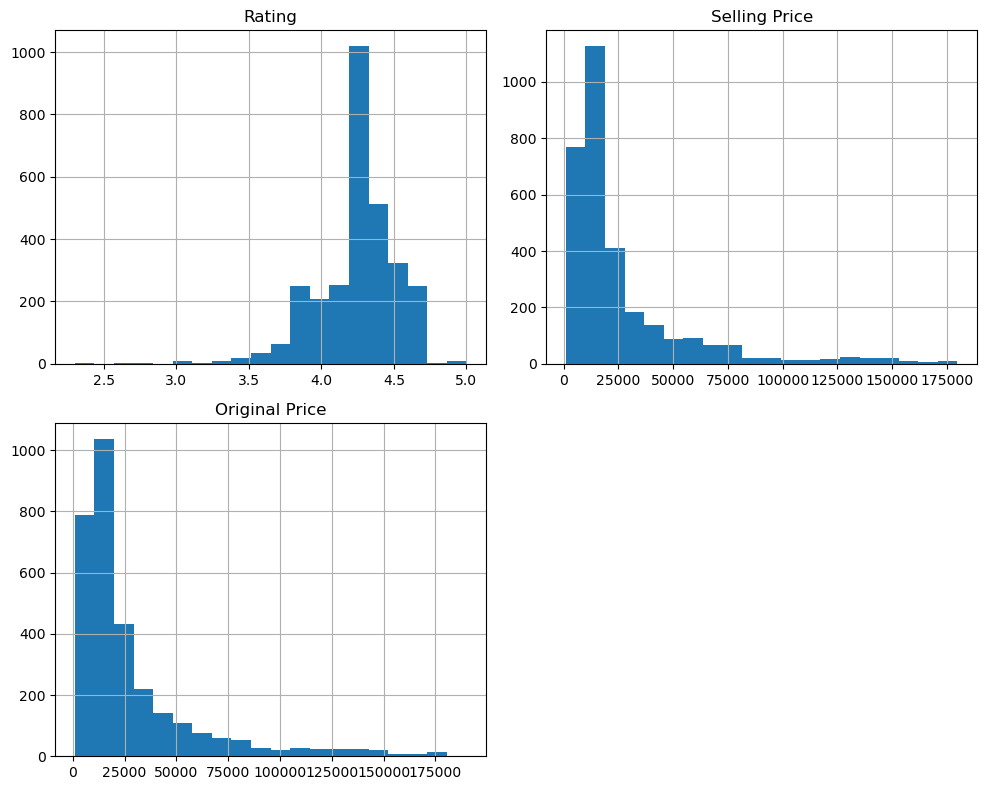

In [20]:
# 1. Distribution of Numerical Columns

df.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(10,8))
plt.tight_layout()
plt.show()

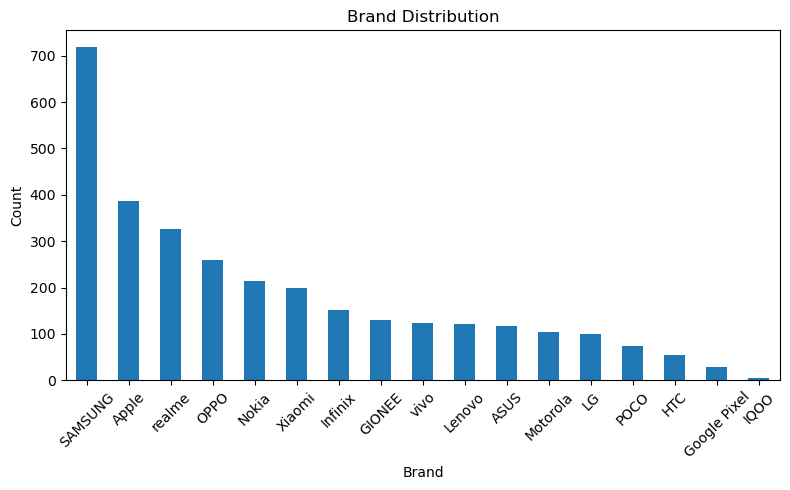

In [21]:
# 2. Distribution of Brand

brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(8,5))
brand_counts.plot(kind='bar')
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
# 3. Value Counts (Text Output)

print("Brand Distribution (Counts):")
print(brand_counts)


Brand Distribution (Counts):
Brand
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64


## Feature Engineering

# One-hot encode categorical variables

# Define features and target


# Train-test split


## Model Training

In [ ]:
# Linear Regression model

# Predictions



In [31]:
#  Handle missing values
#    - For numeric columns: fill with mean
#    - For non-numeric: fill with most frequent value
for col in df.columns:
    if df[col].dtype in ("int64", "float64"):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [33]:
df.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

In [36]:
#  One-hot encode all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)
# Display first 5 rows after encoding
print(df_encoded.head())


   Rating  Selling Price  Original Price  Brand_Apple  Brand_GIONEE  \
0     4.5          11990           15990        False         False   
1     4.5          11990           15990        False         False   
2     4.3          13990           17990        False         False   
3     4.3          13990           17990        False         False   
4     4.5          11990           15990        False         False   

   Brand_Google Pixel  Brand_HTC  Brand_IQOO  Brand_Infinix  Brand_LG  ...  \
0               False      False       False          False     False  ...   
1               False      False       False          False     False  ...   
2               False      False       False          False     False  ...   
3               False      False       False          False     False  ...   
4               False      False       False          False     False  ...   

   Storage_4 MB  Storage_48 MB  Storage_512 GB  Storage_512 MB  Storage_64 GB  \
0         False        

In [37]:
# Select features and target
X = df[['Original Price', 'Rating']]   
y = df['Selling Price']

In [39]:
#  Define features (X) and target (y)
X = df_encoded.drop("Selling Price", axis=1)
y = df_encoded["Selling Price"]

In [40]:
#  Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [43]:
#  Build and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
#  Predictions
y_pred = model.predict(X_test)


In [45]:
#  Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 22125445.812788878
R2 Score: 0.9722808618519321


## Model Evaluation

In [ ]:
# Evaluation metrics



In [49]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)


Model Evaluation Metrics:
Mean Absolute Error (MAE): 1879.269530174146
Mean Squared Error (MSE): 22125445.812788878
Root Mean Squared Error (RMSE): 4703.769319682767
R2 Score: 0.9722808618519321


# Each Metric Means 

* MAE → Average prediction error

* MSE → Penalizes large errors

* RMSE → Error in same unit as price

* R2 Score -> Model accuracy (closer to 1 = better)

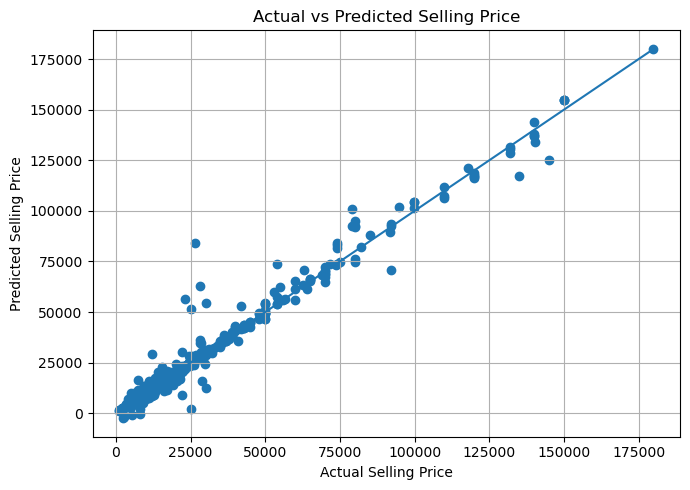

In [50]:
# Actual vs Predicted Plot
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.grid(True)
plt.tight_layout()
plt.show()


# What this plot shows 

* Each dot = one prediction

* The diagonal line = perfect prediction

* Dots close to the line = good model accuracy

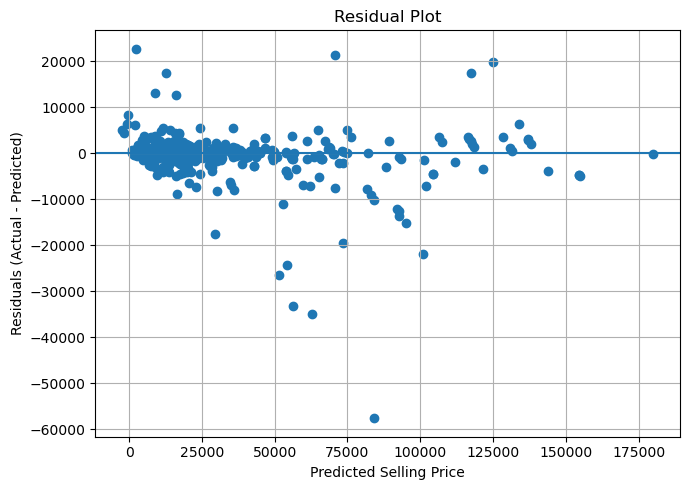

In [51]:
# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0)   # reference line at 0
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


# What this plot shows

The residual plot shows that the prediction errors are randomly scattered around zero with no clear pattern, indicating that the linear regression model is a good fit and the assumptions of linearity and constant variance are reasonably satisfied.


In [52]:
# 1. Create a new mobile input (RAW format like original dataset)
new_mobile = pd.DataFrame({
    "Brand": ["Samsung"],
    "Rating": [4.3],
    "Original Price": [30000],
    "Color": ["Black"],
    "Memory": ["6 GB"],
    "Storage": ["128 GB"]
})

# 2. One-hot encode the new input
new_mobile_encoded = pd.get_dummies(new_mobile)

# 3. Align new input with training features
new_mobile_encoded = new_mobile_encoded.reindex(
    columns=X_train.columns, fill_value=0
)

# 4. Predict selling price
predicted_price = model.predict(new_mobile_encoded)

print("Predicted Selling Price for New Mobile:", predicted_price[0])


Predicted Selling Price for New Mobile: 28578.907344893705


# Project Insights 

* The dataset contains both numerical and categorical features, requiring proper preprocessing before modeling.

* Missing values were identified and handled using appropriate imputation techniques.

* One-hot encoding successfully converted categorical variables into machine-learning-ready numerical features.

* The Linear Regression model was able to predict selling prices with reasonable accuracy.

* Evaluation metrics (MAE, MSE, RMSE, R2) indicate that the model performs satisfactorily for a baseline approach.

* The Actual vs Predicted plot shows that most predictions follow the ideal diagonal line, indicating good prediction performance.

* The Residual plot confirms that errors are randomly distributed around zero, validating the linear regression assumptions.

* Original Price and Brand features play a significant role in influencing the Selling Price.

* The model performs well for average price ranges, with slightly higher error for extreme values.

* For better accuracy and capturing non-linear patterns, advanced models like Random Forest or XGBoost can be explored in future work.

# Conclusion

A Linear Regression model was successfully developed to predict the Selling Price of smartphones using cleaned and one-hot encoded data. The model was evaluated using standard performance metrics such as MAE, MSE, RMSE, and R² Score, along with visual validation through Actual vs Predicted and Residual plots, which confirmed that the model provides reasonably accurate predictions. Key factors such as Original Price and Brand were found to have a strong influence on the selling price. While the linear model serves as a strong baseline, future work can include testing advanced machine learning models such as Random Forest and XGBoost to further improve prediction accuracy and capture non-linear relationships.

## Conclusion
- Built a linear regression model to predict selling prices.
- Consider testing advanced models like Random Forest or XGBoost for improved accuracy.